In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [10]:
def draw_plot():
    # Read data from file
    df = pd.read_csv("./epa-sea-level.csv", float_precision="legacy").rename(
        columns={
            "Year": "year",
            "CSIRO Adjusted Sea Level": "sea",
        }
    )

    # Create scatter plot
    plt.figure(1, figsize=(16, 9))
    plt.scatter(df["year"], df["sea"])

    # Create first line of best fit
    regress = linregress(df["year"], df["sea"])

    last_year = df["year"].max()
    df = df.append([{"year": y} for y in range(last_year + 1, 2050)])
    plt.plot(
        df["year"],
        regress.intercept + regress.slope * df["year"],
        c="r",
        label="fit all",
    )
    
        # Create second line of best fit
    df_recent = df.loc[(df["year"] >= 2000) & (df["year"] <= last_year)]
    bestfit = linregress(df_recent["year"], df_recent["sea"])
    df_recent = df_recent.append(
        [{"year": y} for y in range(last_year + 1, 2050)]
    )
    plt.plot(
        df_recent["year"],
        bestfit.intercept + bestfit.slope * df_recent["year"],
        c="b",
        label="fit recent",
    )

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

C:\Users\pc\AppData\Local\Temp\ipykernel_1020\2281066730.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{"year": y} for y in range(last_year + 1, 2050)])
C:\Users\pc\AppData\Local\Temp\ipykernel_1020\2281066730.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recent = df_recent.append(


AxesSubplot(0.125,0.11;0.775x0.77)


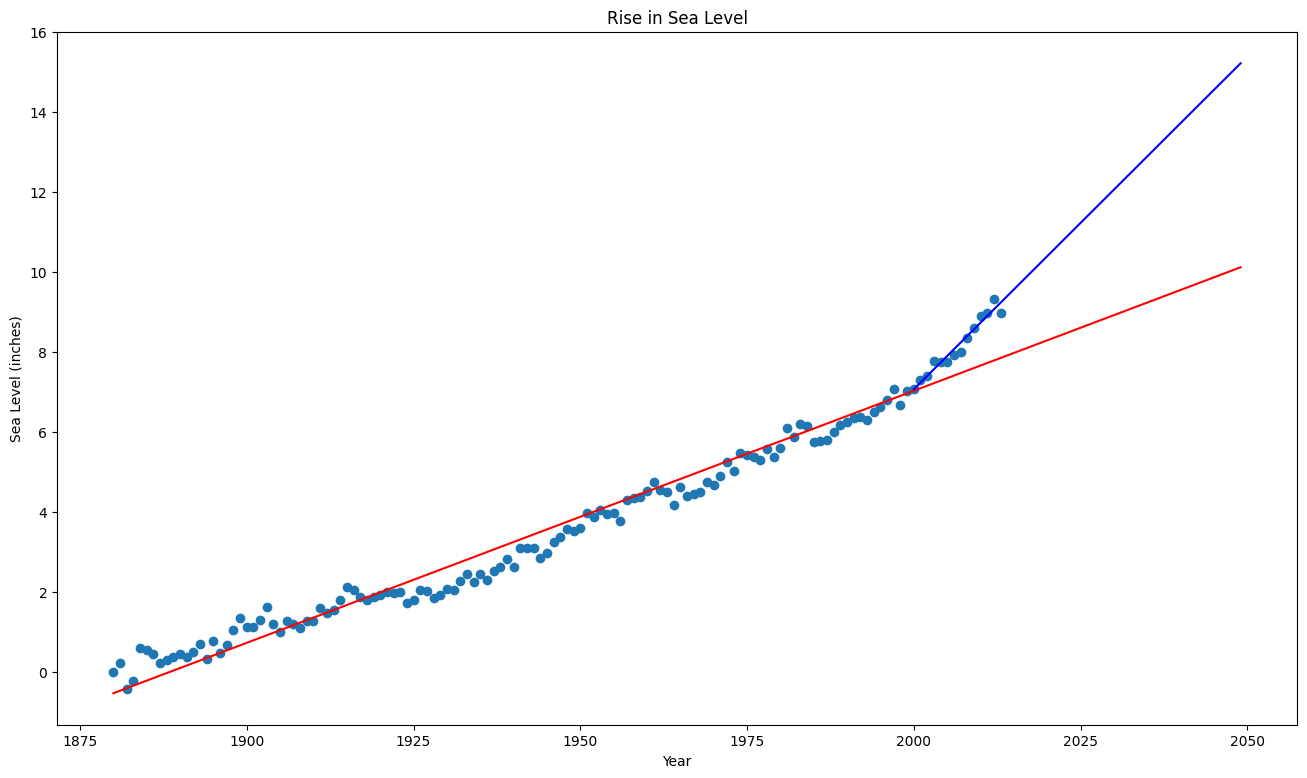

In [16]:
print(draw_plot())